### Lamin

In [3]:
library(rio)
source('./ABCA7lof2/plotting.r')
library(ggplot2)
library(outliers)


In [2]:
data <- import_list('./raw_data/experimental/LaminAC_shape_measure.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_lam', 'intden_lam','count', 'perc_area', 'mean', 'intden', 'circ') 
                      
out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Circ') | startsWith(x, 'IntDen')| startsWith(x, 'Count')| startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$circ = as.numeric(full_data$circ)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `` -> `...3`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntD

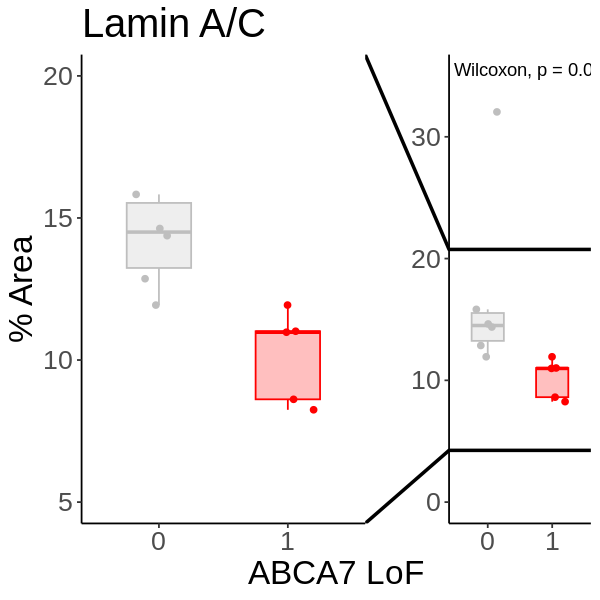

In [33]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$perc_area, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+ylim(0,35)+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') +
facet_zoom(ylim = c(5, 20))

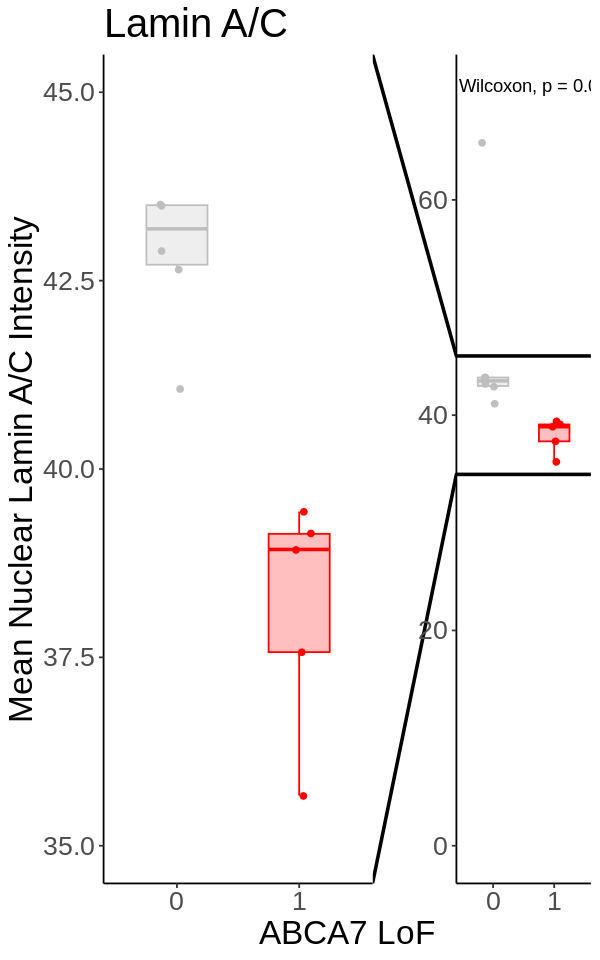

In [31]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_lam, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)

options(repr.plot.width=5, repr.plot.height=8)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+ylim(0,70)+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('Mean Nuclear Lamin A/C Intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') +
facet_zoom(ylim = c(35, 45))

### Tom20

In [34]:
library(rio)
source('./ABCA7lof2/plotting.r')

In [40]:
data <- import_list('./raw_data/experimental/Tomm20count_NeuNROI.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_tom', 'intden_tom', 'count', 'av_size', 'perc_area', 'mean', 'intden')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Average') | startsWith(x, 'IntDen') | startsWith(x, 'Count') |startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDe

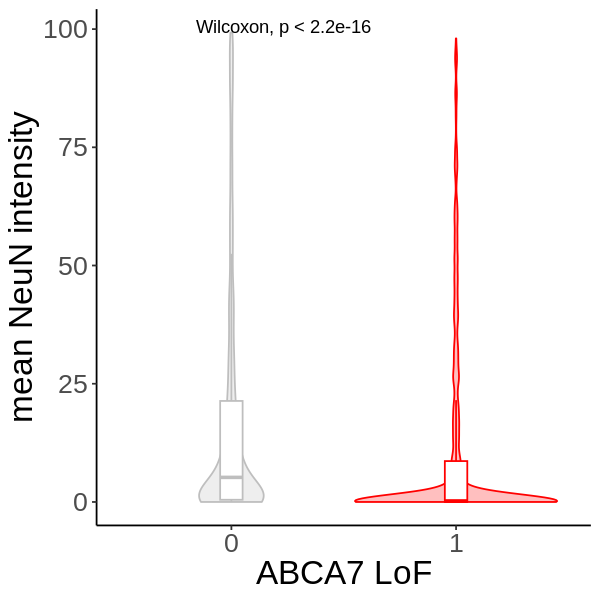

In [45]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (perc_area),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean NeuN intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

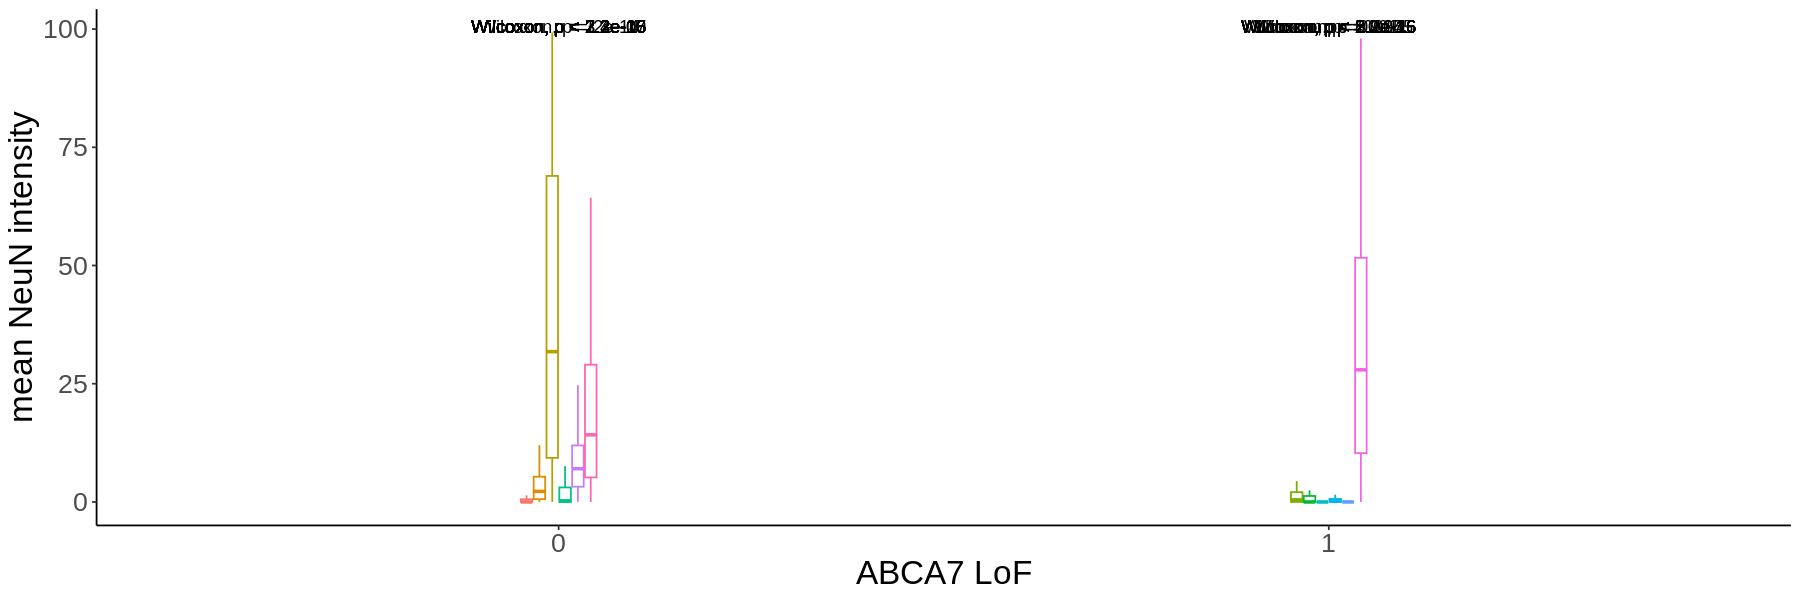

In [77]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (perc_area),
          color = (projid) ))+geom_boxplot(width=.1, outlier.alpha=0, fill='white')+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic()  + ylab('mean NeuN intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

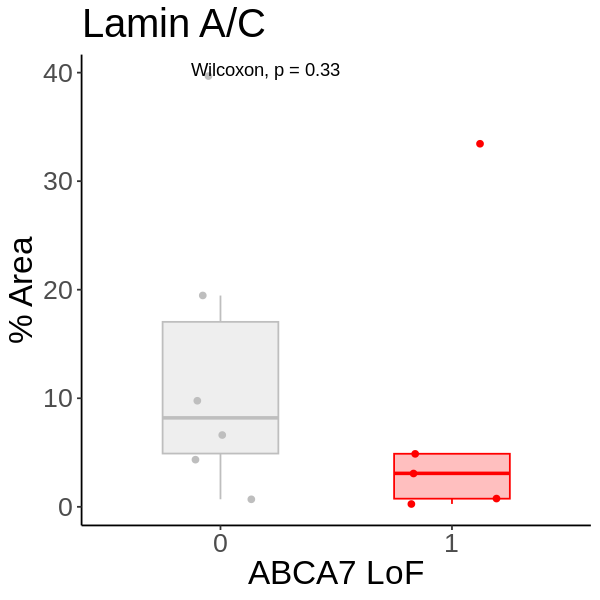

In [103]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$perc_area, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}
T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') 

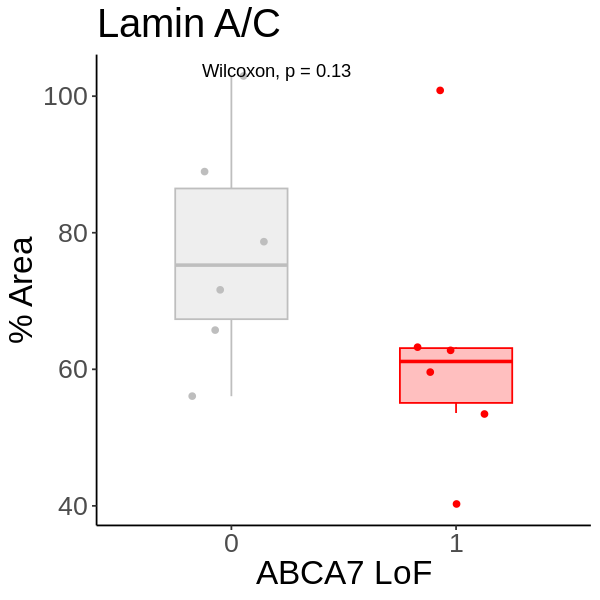

In [100]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_tom, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)


options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C')

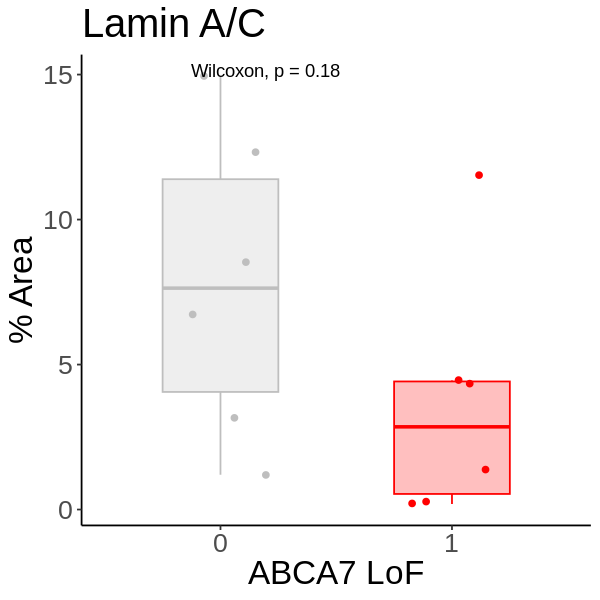

In [98]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)


options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C')

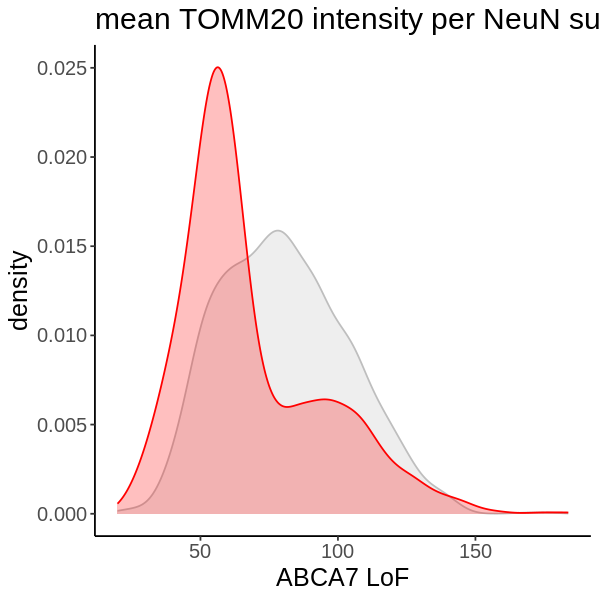

In [104]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (mean_tom),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean TOMM20 intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))   #+ geom_jitter()#+ylim(0,1)

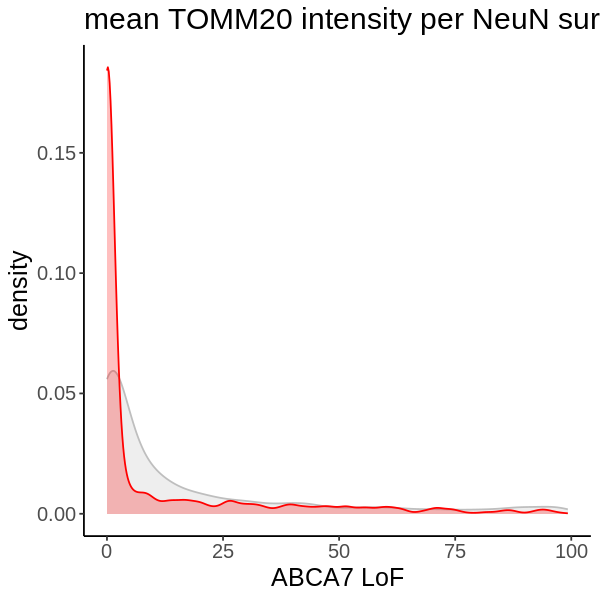

In [105]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (perc_area),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean TOMM20 intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))   #+ geom_jitter()#+ylim(0,1)

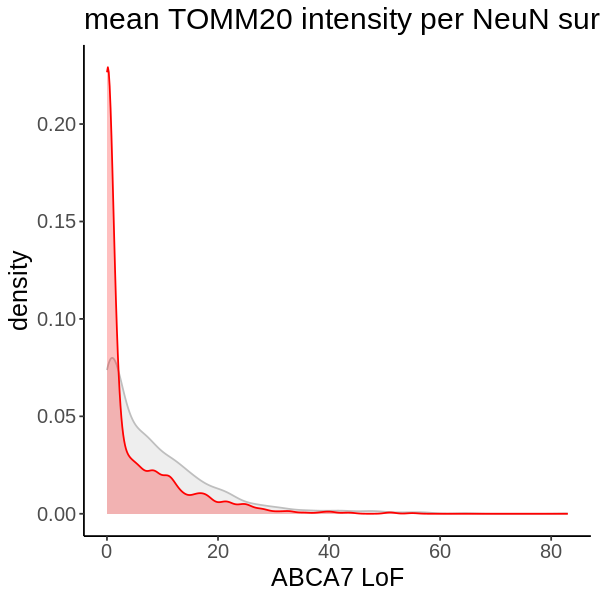

In [106]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (count),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean TOMM20 intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))   #+ geom_jitter()#+ylim(0,1)

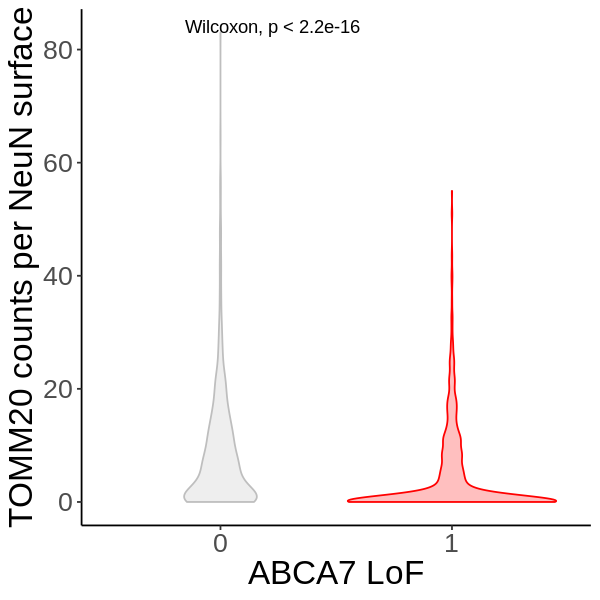

In [107]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = count,
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('TOMM20 counts per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

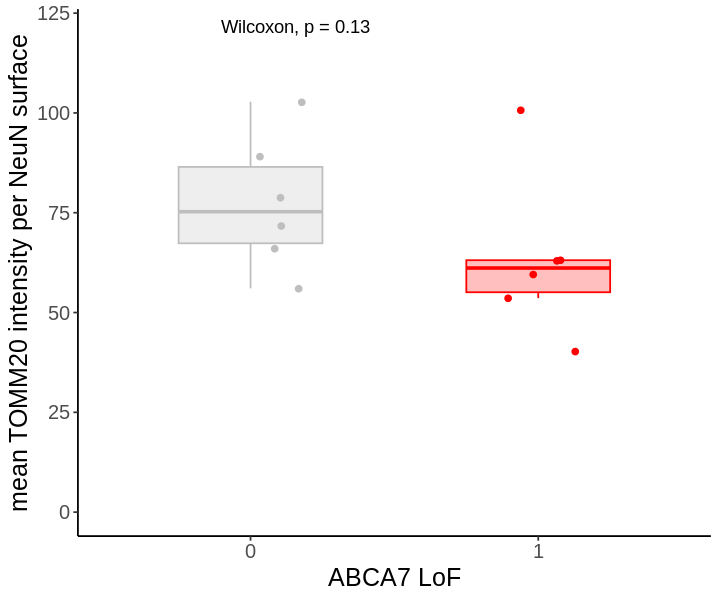

In [376]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_tom, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean TOMM20 intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 15)) + ylim(0,120)

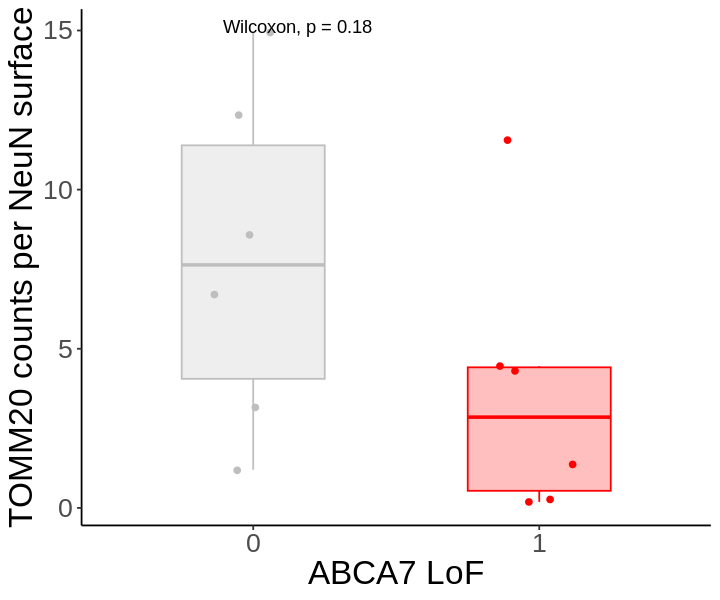

In [377]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('TOMM20 counts per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

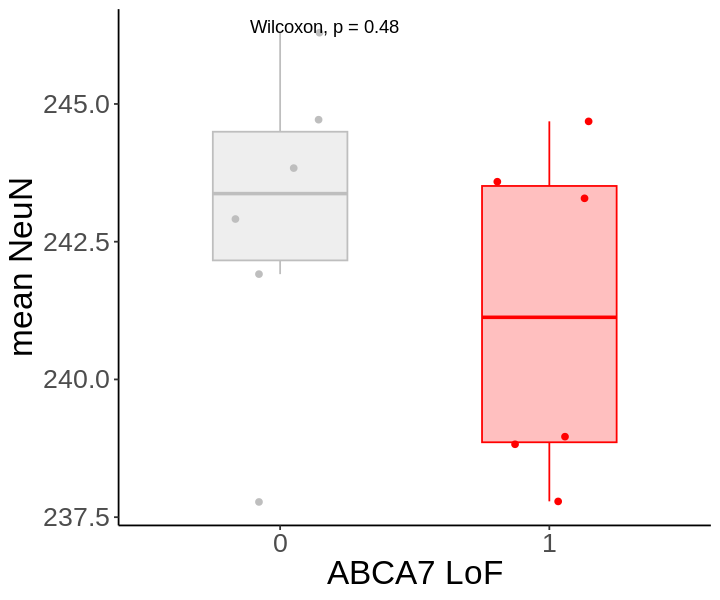

In [378]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_neun, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean NeuN') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

### bodipy chol

In [448]:
data <- import_list('./raw_data/experimental/bodipychol_dropletperROI-intensity.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_bod', 'intden_bod', 'count', 'av_size', 'mean', 'intden')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Average') | startsWith(x, 'IntDen') | startsWith(x, 'Count')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDe

In [380]:
head(full_data)

,mean_neun,intden_neun,mean_dapi,intden_dapi,mean_bod,intden_bod,count,av_size,mean,intden,projid,LOF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,239.514,10195.359,23.632,1005.921,60.162,2560.903,0,0.000,0.00,0.000,50108174,1
2,218.803,17797.933,20.811,1692.850,40.307,3278.680,0,0.000,0.00,0.000,50108174,1
3,224.195,5756.862,18.651,478.920,62.255,1598.583,1,0.172,140.00,24.127,50108174,1
4,216.266,8833.048,23.734,969.386,70.540,2881.102,4,0.345,130.25,45.453,50108174,1
5,224.400,8701.212,20.324,788.090,72.947,2828.540,0,0.000,0.00,0.000,50108174,1
6,215.873,7031.282,20.952,682.448,76.042,2476.804,5,0.172,134.40,23.162,50108174,1


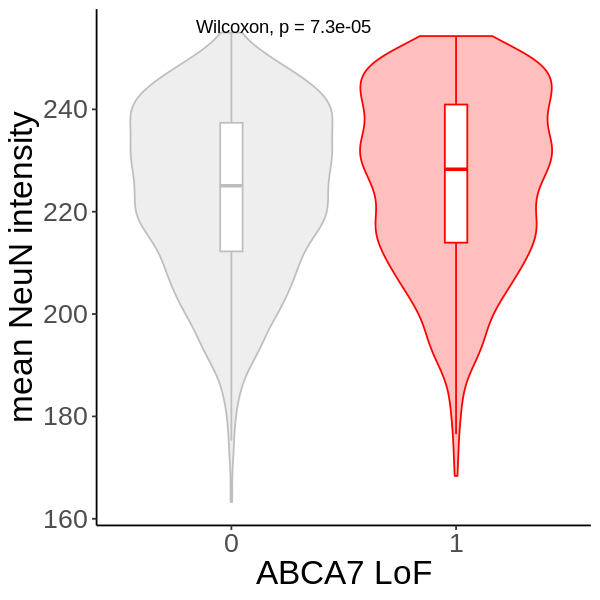

In [449]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_neun),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean NeuN intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

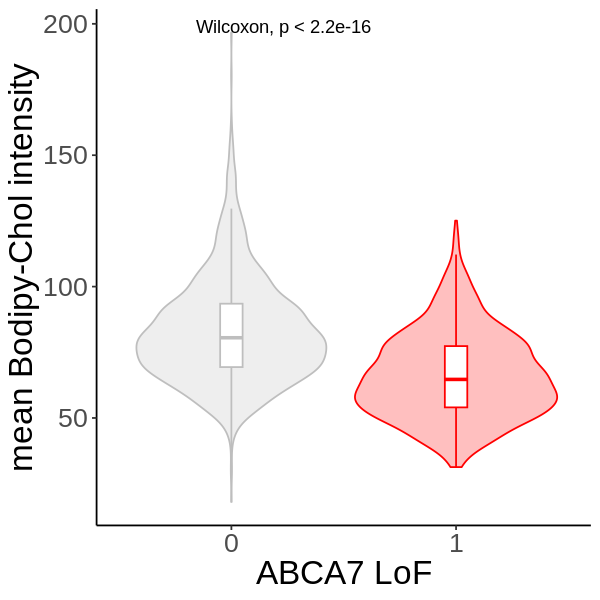

In [450]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_bod),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean Bodipy-Chol intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

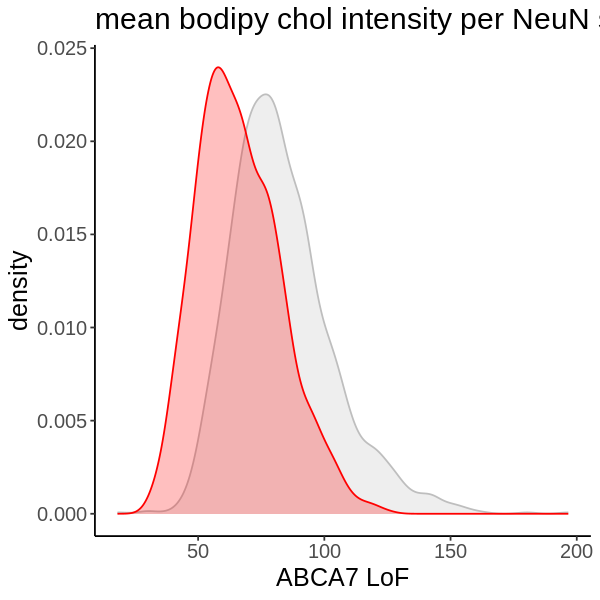

In [452]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (mean_bod),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean bodipy chol intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))   #+ geom_jitter()#+ylim(0,1)

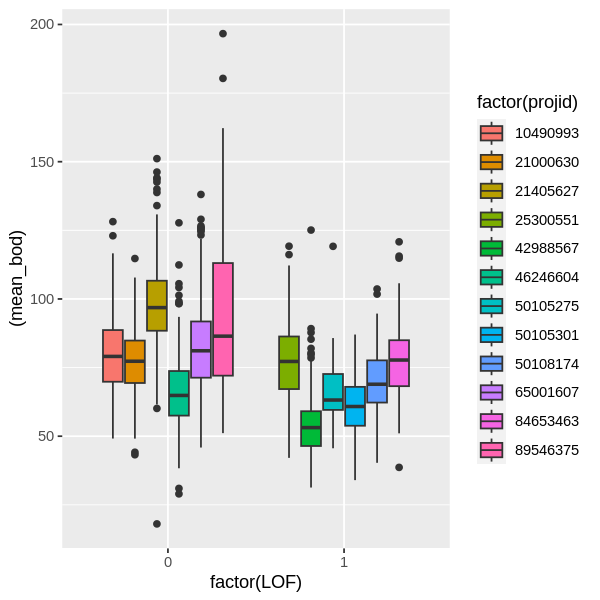

In [387]:

ggplot(full_data, aes(x = factor(LOF), y = (mean_bod),
          fill = factor(projid) ))+ geom_boxplot()

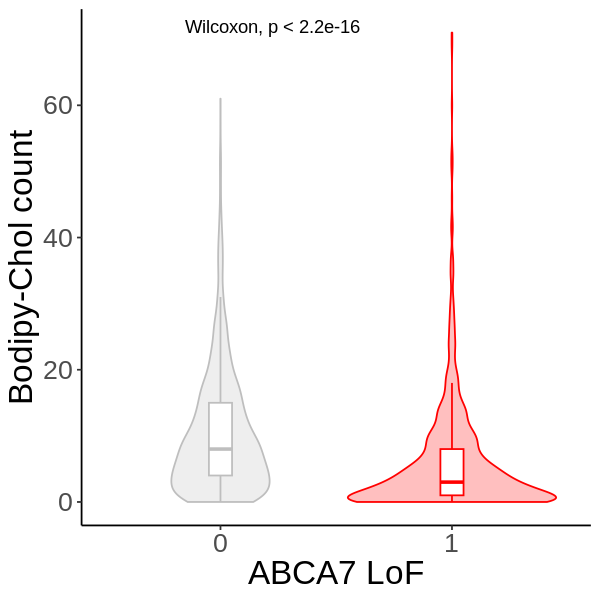

In [391]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (count),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('Bodipy-Chol count') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

Warning message:
“Removed 361 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 361 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 361 rows containing non-finite values (`stat_compare_means()`).”


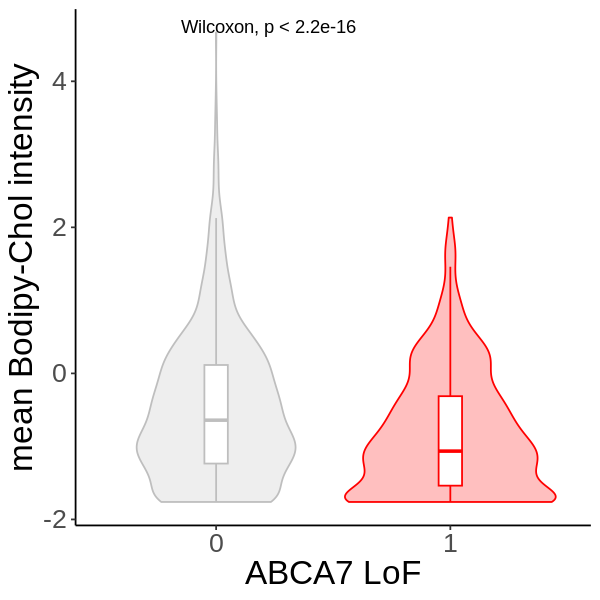

In [393]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = log(av_size),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean Bodipy-Chol intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

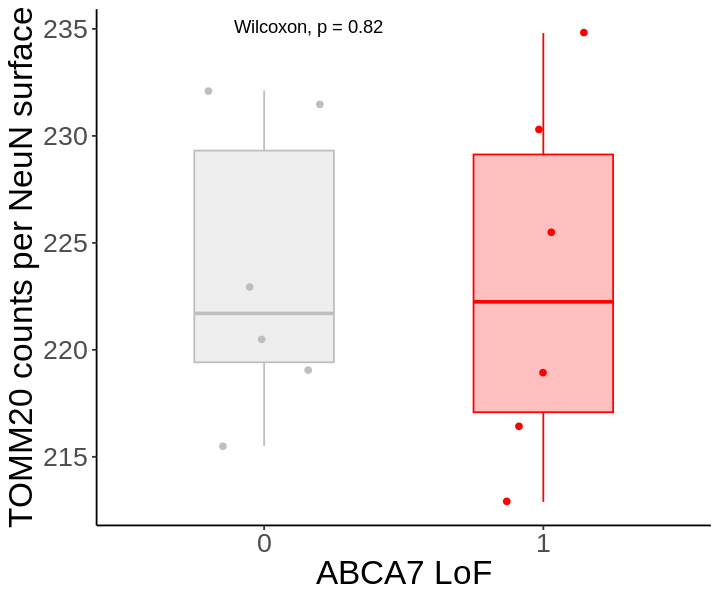

In [394]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_neun, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('TOMM20 counts per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

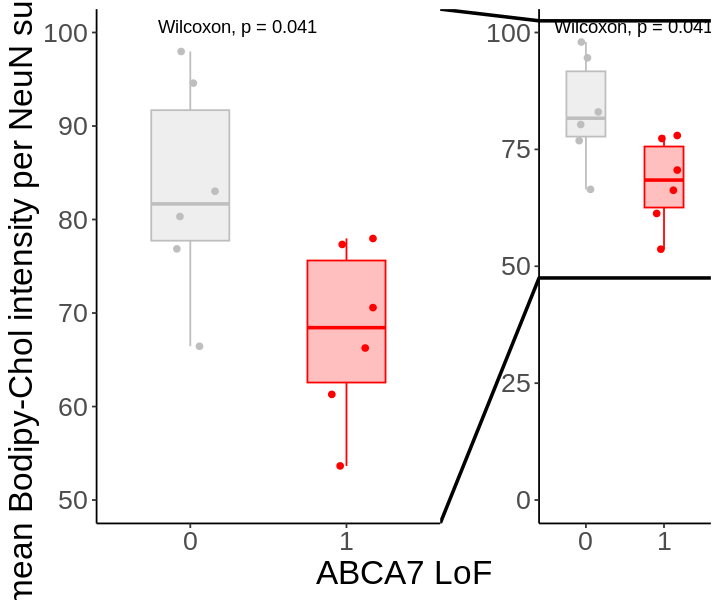

In [411]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_bod, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean Bodipy-Chol intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) +ylim(0,100)+
facet_zoom(ylim = c(50,100))

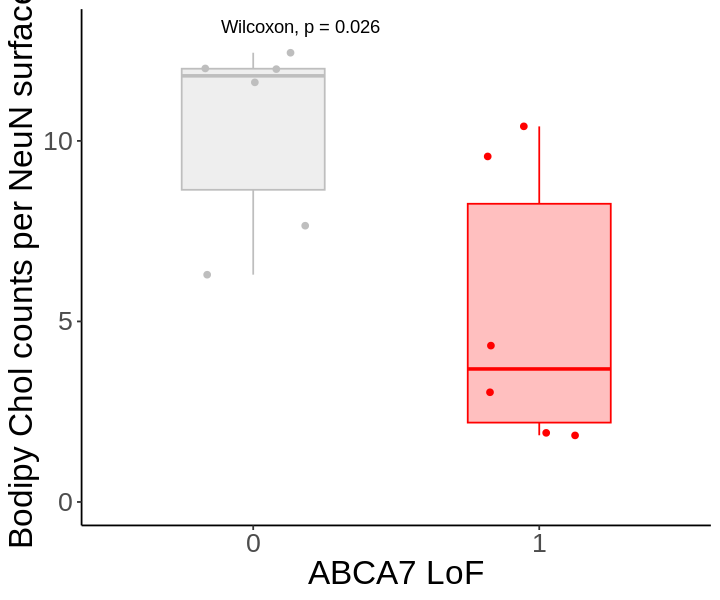

In [413]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('Bodipy Chol counts per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ylim(0,13) 

### bodipy

In [453]:
data <- import_list('./raw_data/experimental/bodipy_dropletperROI-intensity.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_bod', 'intden_bod', 'count', 'av_size', 'mean', 'intden')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Average') | startsWith(x, 'IntDen') | startsWith(x, 'Count')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDe

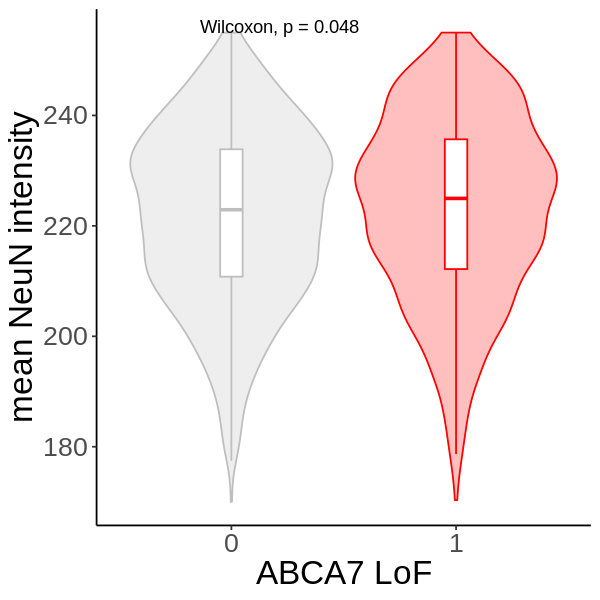

In [415]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_neun),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean NeuN intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

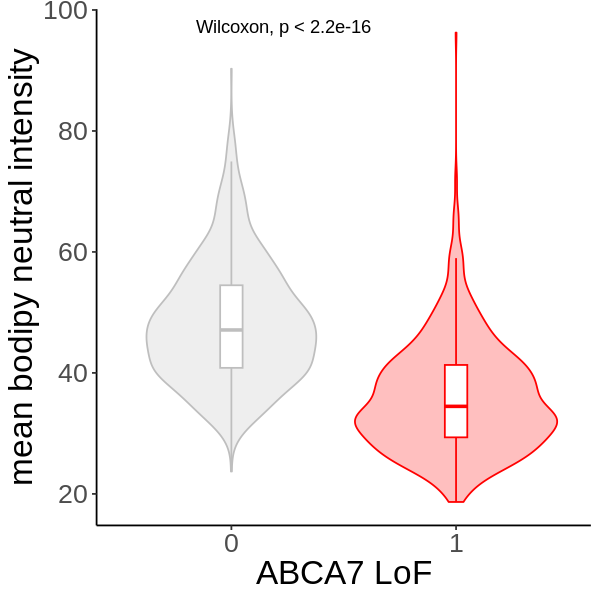

In [454]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_bod),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean bodipy neutral intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

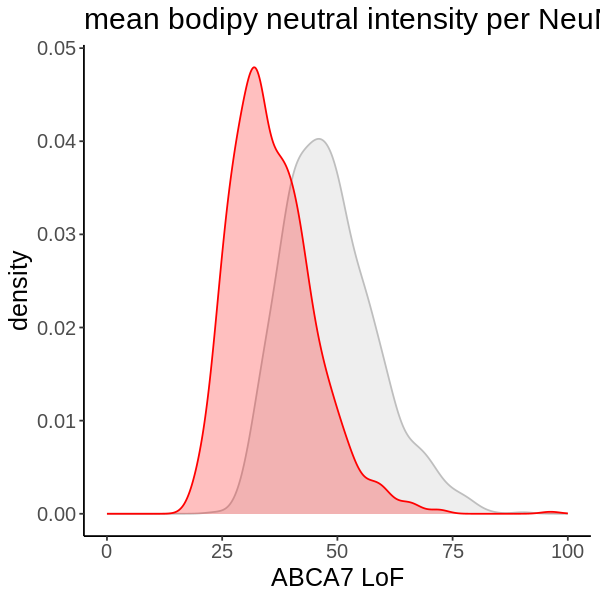

In [457]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (mean_bod),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean bodipy neutral intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))+xlim(0,100)   #+ geom_jitter()#+ylim(0,1)

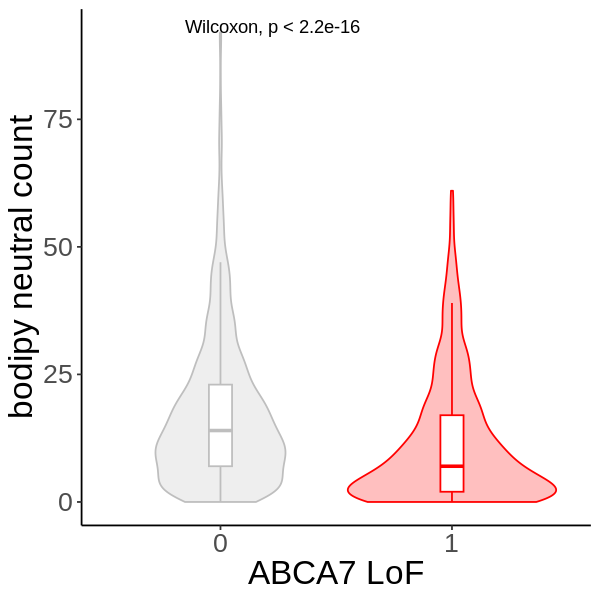

In [419]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (count),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('bodipy neutral count') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

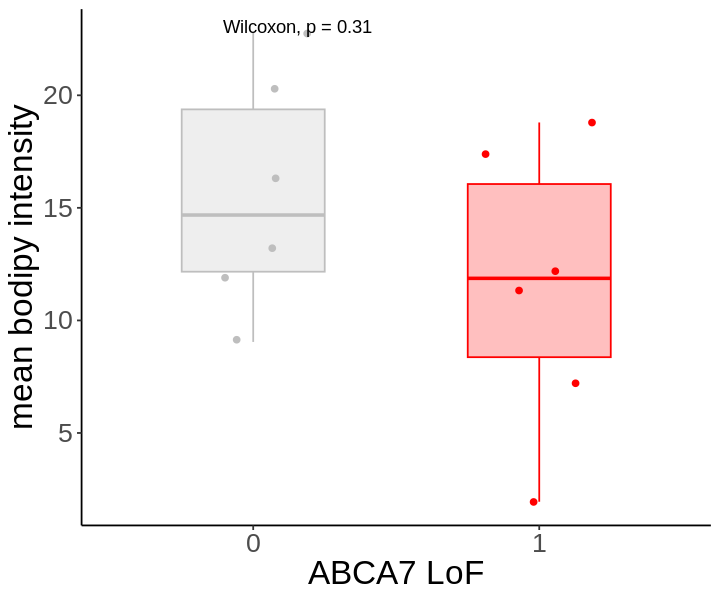

In [421]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean bodipy intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

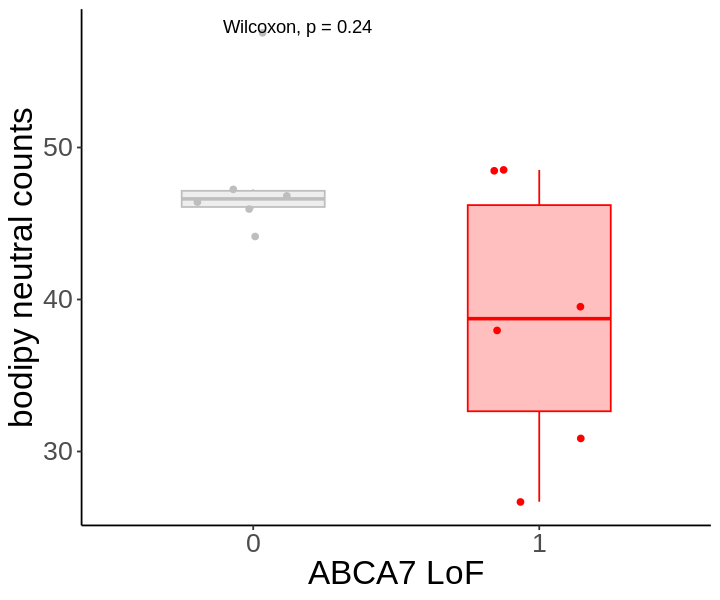

In [422]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_bod, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('bodipy neutral counts') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

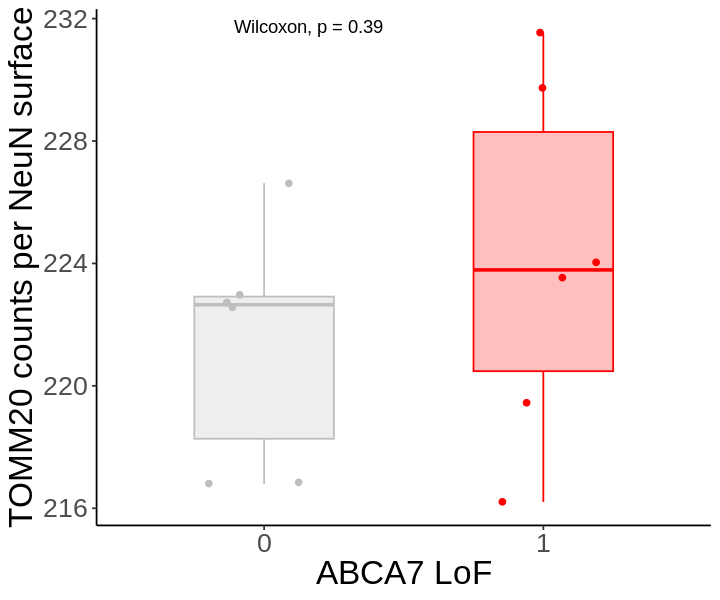

In [403]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_neun, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('TOMM20 counts per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

### srebp

In [458]:
data <- import_list('./raw_data/experimental/SREBP2_DAPIROIs.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('area_neun', 'mean_neun', 'intden_neun', 'area_dapi', 'mean_dapi', 'intden_dapi', 'area_rage', 'mean_rage', 'intden_rage', 'area_sreb', 'mean_sreb', 'intden_sreb')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Area') | startsWith(x, 'IntDen') ))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
                               
full_data = full_data[full_data$mean_neun>40 & full_data$mean_dapi>0 & full_data$area_neun<70,]

New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawIntDen...20`
New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawI

ERROR: Error in `$<-.data.frame`(`*tmp*`, intden, value = numeric(0)): replacement has 0 rows, data has 6403


In [424]:
head(full_data)

,area_neun,mean_neun,intden_neun,area_dapi,mean_dapi,intden_dapi,area_rage,mean_rage,intden_rage,area_sreb,mean_sreb,intden_sreb,projid,LOF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,12.580,95.082,1196.180,12.580,47.178,593.523,12.580,27.329,343.809,12.580,16.082,202.322,50108174,1
2,23.782,86.543,2058.201,23.782,38.928,925.785,23.782,23.188,551.473,23.782,11.848,281.768,50108174,1
3,18.440,81.636,1505.349,18.440,138.720,2557.974,18.440,30.757,567.156,18.440,17.121,315.718,50108174,1
4,34.639,156.507,5421.325,34.639,46.537,1612.025,34.639,21.995,761.895,34.639,18.766,650.049,50108174,1
5,21.370,93.597,2000.124,21.370,54.024,1154.474,21.370,23.065,492.879,21.370,13.847,295.900,50108174,1
6,35.156,111.088,3905.464,35.156,50.127,1762.301,35.156,22.490,790.675,35.156,13.441,472.544,50108174,1


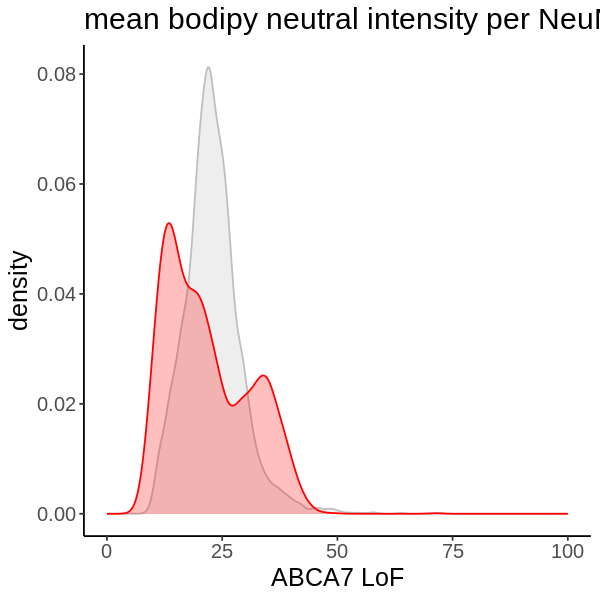

In [459]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = (mean_sreb),
          fill = factor(LOF) ))+ geom_density(alpha=0.25,aes(color=factor(LOF))) + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('density') + xlab('ABCA7 LoF')+ ggtitle('mean bodipy neutral intensity per NeuN surface') + theme(legend.position = "none")+ theme(text = element_text(size = 15))+xlim(0,100)   #+ geom_jitter()#+ylim(0,1)

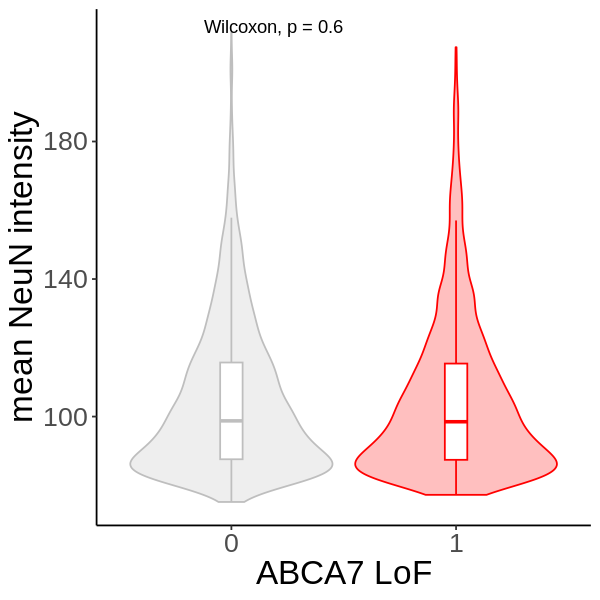

In [426]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_neun),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean NeuN intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

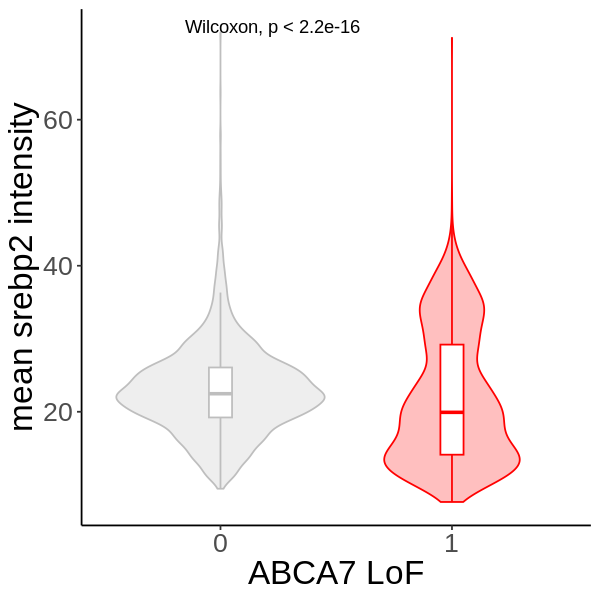

In [434]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_sreb),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean srebp2 intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

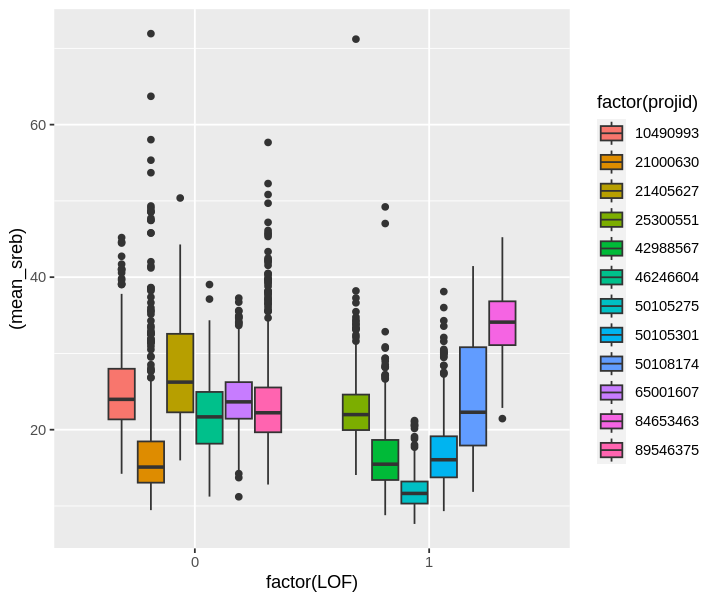

In [433]:
ggplot(full_data, aes(x = factor(LOF), y = (mean_sreb),
          fill = factor(projid) ))+ geom_boxplot()

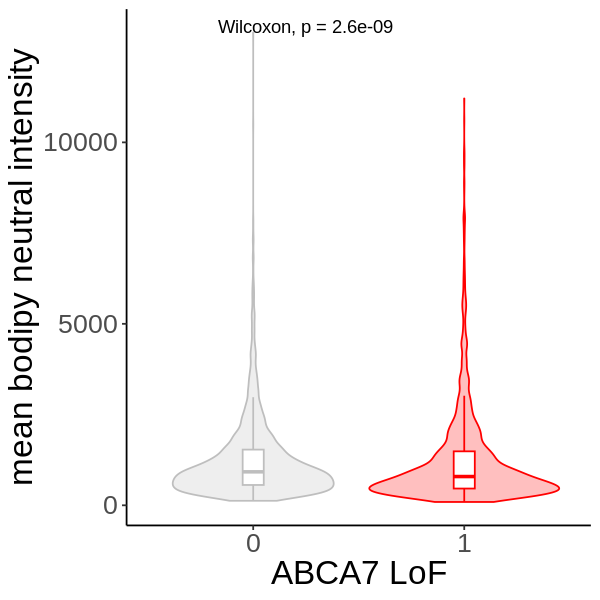

In [428]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(full_data, aes(x = factor(LOF), y = (intden_sreb),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean bodipy neutral intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

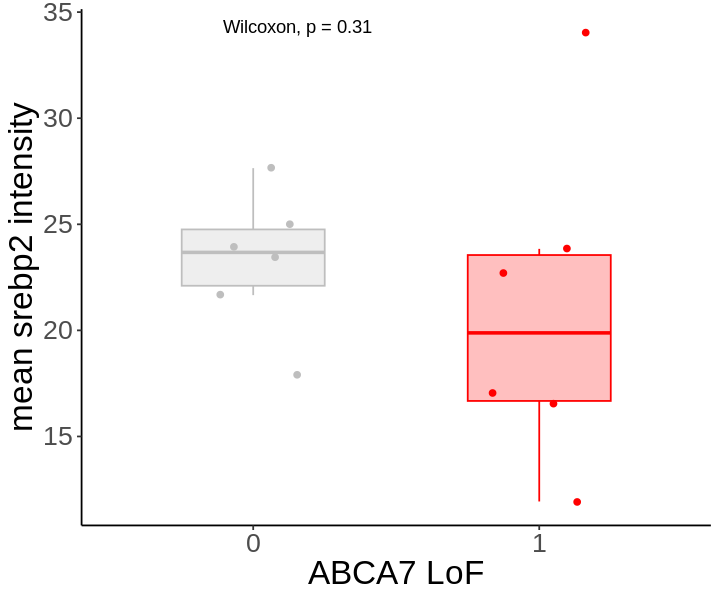

In [435]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_sreb, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean srebp2 intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 

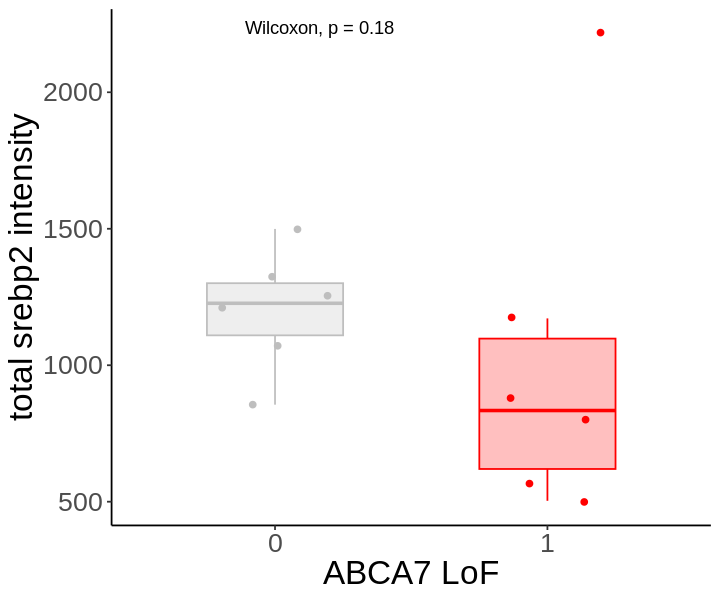

In [437]:
library(ggforce)

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$intden_sreb, by=list(temp$projid, temp$LOF), 'mean')

options(repr.plot.width=6, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('total srebp2 intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20)) 